In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화|면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image

# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회귀분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델



# Decision Tree 
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier
# KNN 결측처리
from sklearn.impute import KNNImputer

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumGothic')
plt.rc('axes', unicode_minus=False)

## 1. 데이터 확인 및 전처리

In [3]:
df = pd.read_csv('/home/piai/바탕화면/123/2. Big Data 분석/SCALE불량.csv', encoding = 'euc-kr')
df

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,PLT_1996,10JAN2023:05:32:25,양품,BV-A,프랑스,C,19,3400,41500,적용,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,PLT_1997,10JAN2023:05:39:19,양품,LR-A,영국,C,19,3400,41500,적용,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,PLT_1998,10JAN2023:05:52:41,양품,AB/AH32,미국,C,17,3400,43700,적용,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,PLT_1999,10JAN2023:06:01:50,양품,NV-A32,영국,C,17,3400,43700,적용,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 non-null   i

In [5]:
df.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [6]:
# plate 번호는 ID이기 때문에 분석에 필요없기에 drop한다.
df.drop("plate_no", axis = 1, inplace = True)

# scale 범주형 -> 수치형
df['scale'] = df['scale'].map({'양품': 0, '불량':1})

df

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,03JAN2023:07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,03JAN2023:07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,03JAN2023:07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,03JAN2023:07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,03JAN2023:07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10JAN2023:05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,203,1151,CR(제어압연),948,10,4조
996,10JAN2023:05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,1142,55,1151,86,209,1151,CR(제어압연),948,10,4조
997,10JAN2023:05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,227,1163,CR(제어압연),948,10,4조
998,10JAN2023:06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,1169,65,1163,77,204,1163,CR(제어압연),948,10,4조


In [7]:
# 시간변수를 datetime형식으로 변환

df['rolling_date'] = pd.to_datetime(df['rolling_date'], format='%d%b%Y:%H:%M:%S')
df_sorted = df.sort_values(by = 'rolling_date', ascending = True)

In [8]:
df['rolling_date'].value_counts().sort_index()

2023-01-03 07:07:53    1
2023-01-03 07:21:22    1
2023-01-03 07:31:15    1
2023-01-03 07:41:01    1
2023-01-03 07:52:40    1
                      ..
2023-01-10 05:32:25    1
2023-01-10 05:39:19    1
2023-01-10 05:52:41    1
2023-01-10 06:01:50    1
2023-01-10 06:16:27    1
Name: rolling_date, Length: 1000, dtype: int64

In [9]:
# 날짜별로 이틀씩 묶기
# 1월 3~4:1, 1월 5~6:2, 1월 7~8:3, 1월 9~10:4

# 2일 간격으로 날짜 구간을 생성
bins = pd.date_range(start='2023-01-03', end='2023-01-11', freq='2D')

# 숫자 라벨 생성 (1, 2, 3, ...)
bin_labels = range(1, len(bins))

# 'rolling_date'를 이용하여 각 날짜를 구간에 할당하고 숫자 라벨을 사용
df['date_n'] = pd.cut(df['rolling_date'], bins=bins, labels=bin_labels, right=False)

df

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
0,2023-01-03 07:07:53,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,1
1,2023-01-03 07:21:22,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,1
2,2023-01-03 07:31:15,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,1
3,2023-01-03 07:41:01,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,1
4,2023-01-03 07:52:40,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-10 05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,4
996,2023-01-10 05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,4
997,2023-01-10 05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,4
998,2023-01-10 06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,4


In [10]:
# 수치형 데이터만 골라보기
df_numeric = df.select_dtypes(exclude = 'object')
df_numeric

,rolling_date,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,date_n
0,2023-01-03 07:07:53,0,32,3700,15100,1144,116,1133,59,259,1133,934,8,1
1,2023-01-03 07:21:22,0,32,3700,15100,1144,122,1135,53,238,1135,937,8,1
2,2023-01-03 07:31:15,0,33,3600,19200,1129,116,1121,55,258,1121,889,8,1
3,2023-01-03 07:41:01,0,33,3600,19200,1152,125,1127,68,266,1127,885,8,1
4,2023-01-03 07:52:40,0,38,3100,13300,1140,134,1128,48,246,1128,873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-10 05:32:25,0,19,3400,41500,1142,55,1151,86,203,1151,948,10,4
996,2023-01-10 05:39:19,0,19,3400,41500,1142,55,1151,86,209,1151,948,10,4
997,2023-01-10 05:52:41,0,17,3400,43700,1169,65,1163,77,227,1163,948,10,4
998,2023-01-10 06:01:50,0,17,3400,43700,1169,65,1163,77,204,1163,948,10,4


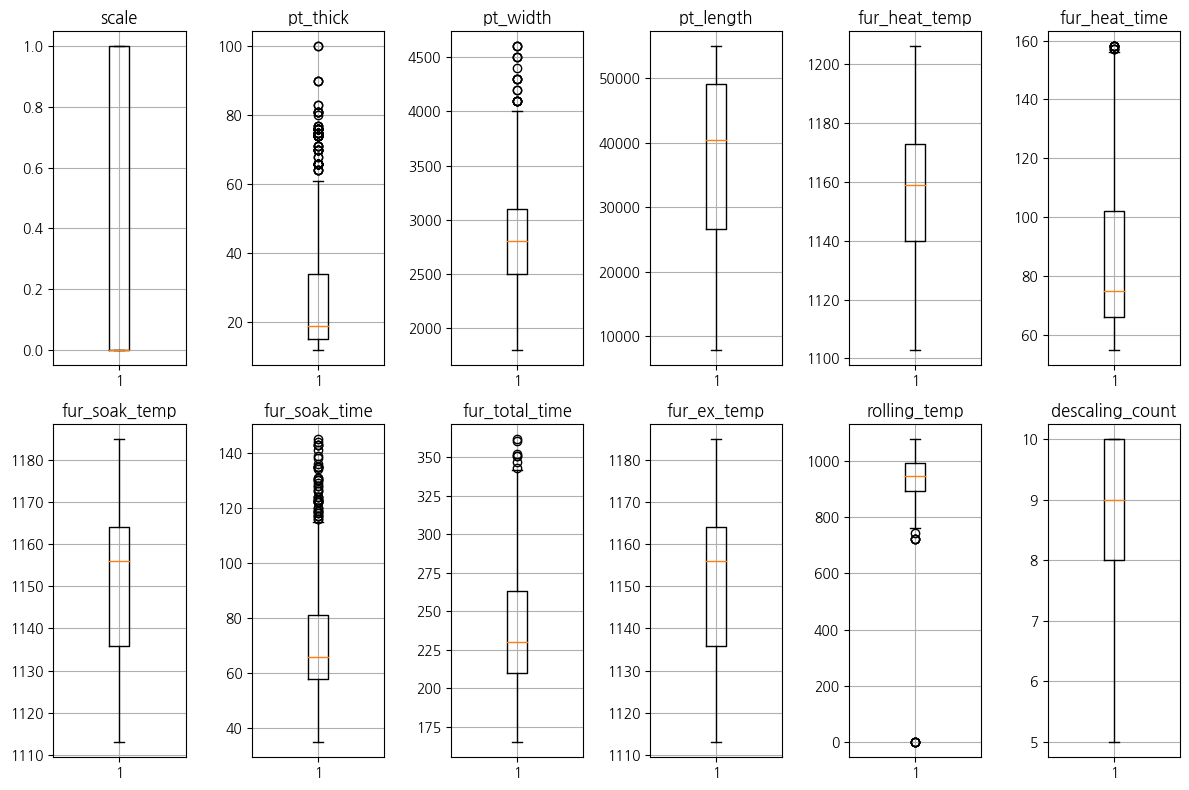

In [11]:
# 이상치를 보기위한 박스플롯 그래프

# 박스플롯 그리기
plt.figure(figsize=(12, 8))  # 그래프의 크기 설정

# 숫자형 열 선택
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 그리기
num_plots = len(numeric_cols)
n_rows = 2
n_cols = (num_plots + 1) // 2  # 열의 수를 설정

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # 그래프 레이아웃 설정
    plt.boxplot(df[col], whis=1.5)
    plt.title(col)
    plt.grid(True)

plt.tight_layout()  # 그래프 간의 간격 조절
plt.show()  # 그래프 표시

* 압연온도 0도 -> 이상치라고 판단함
* 따라서 rolling_temp가 0인 경우는 제외하기로 결정함.

In [12]:
df[df['rolling_temp']<100]

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
53,2023-01-03 16:22:29,0,GL-E36-TM,독일,T,56,3800,11400,적용,3호기,...,95,1128,80,244,1128,TMCP(온도제어),0,6,1조,1
221,2023-01-04 19:44:09,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,57,1166,67,228,1166,CR(제어압연),0,10,2조,1
222,2023-01-04 19:56:39,0,JS-SM490YB,일본,C,16,2200,43600,적용,3호기,...,64,1164,61,188,1164,CR(제어압연),0,10,2조,1
598,2023-01-07 11:40:51,0,PILAC-BT33,한국,T,81,2100,12900,적용,2호기,...,89,1122,59,229,1122,CR(제어압연),0,6,3조,3
599,2023-01-07 11:52:00,0,PILAC-BT33,한국,T,81,2100,13200,적용,1호기,...,92,1124,61,210,1124,CR(제어압연),0,6,3조,3
600,2023-01-07 11:59:10,0,NV-D32-TM,영국,T,40,2500,23600,적용,3호기,...,109,1117,76,260,1117,TMCP(온도제어),0,6,3조,3


<Axes: >

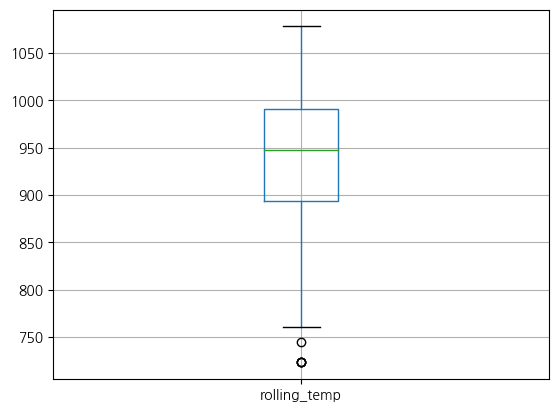

In [13]:
# 압연온도 0도 -> 이상치 제거함
df = df.drop(df[df['rolling_temp']<100].index, axis=0).reset_index()

# 이상치제거확인
df.boxplot('rolling_temp')

## 2. 탐색적분석

Text(0, 0.5, '빈도')

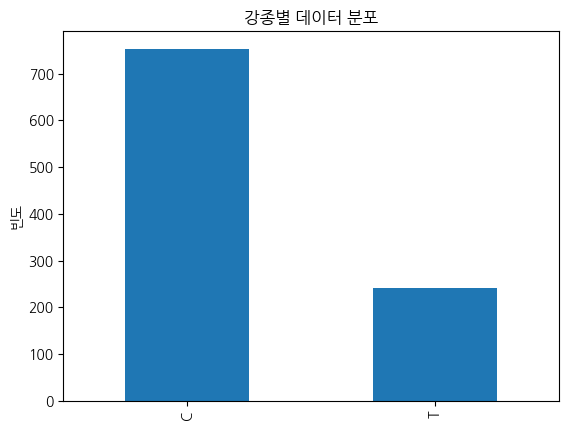

In [14]:
# 강종 별 데이터 수 확인
df_s = df["steel_kind"].value_counts()
df_s.sort_index(inplace = True)

# 그래프 제목과 축 라벨 설정
df_s.plot.bar()
plt.title('강종별 데이터 분포')
plt.ylabel('빈도')

In [15]:
df['steel_kind'].value_counts()

C    753
T    241
Name: steel_kind, dtype: int64

In [16]:
# 탄소강만 추출
df[df["steel_kind"]=="C"].reset_index(drop=True).drop(columns=['index'])

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
0,2023-01-04 03:00:41,0,BV-B,프랑스,C,20,3600,39300,적용,3호기,...,76,1126,118,297,1126,CR(제어압연),934,8,2조,1
1,2023-01-04 03:14:24,0,BV-B,프랑스,C,20,3600,39500,적용,3호기,...,68,1132,104,235,1132,CR(제어압연),911,8,2조,1
2,2023-01-04 03:19:27,0,AB/B,미국,C,17,3400,39600,적용,2호기,...,71,1130,112,240,1130,CR(제어압연),935,10,2조,1
3,2023-01-04 03:28:12,0,LR-B,영국,C,17,3400,39600,적용,2호기,...,71,1130,112,287,1130,CR(제어압연),935,10,2조,1
4,2023-01-04 03:42:56,0,JS-SM490YB,일본,C,14,3300,51200,적용,1호기,...,80,1131,117,286,1131,CR(제어압연),915,10,2조,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,2023-01-10 05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,4
749,2023-01-10 05:39:19,0,LR-A,영국,C,19,3400,41500,적용,1호기,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,4
750,2023-01-10 05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,4
751,2023-01-10 06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,2호기,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,4


<function matplotlib.pyplot.show(close=None, block=None)>

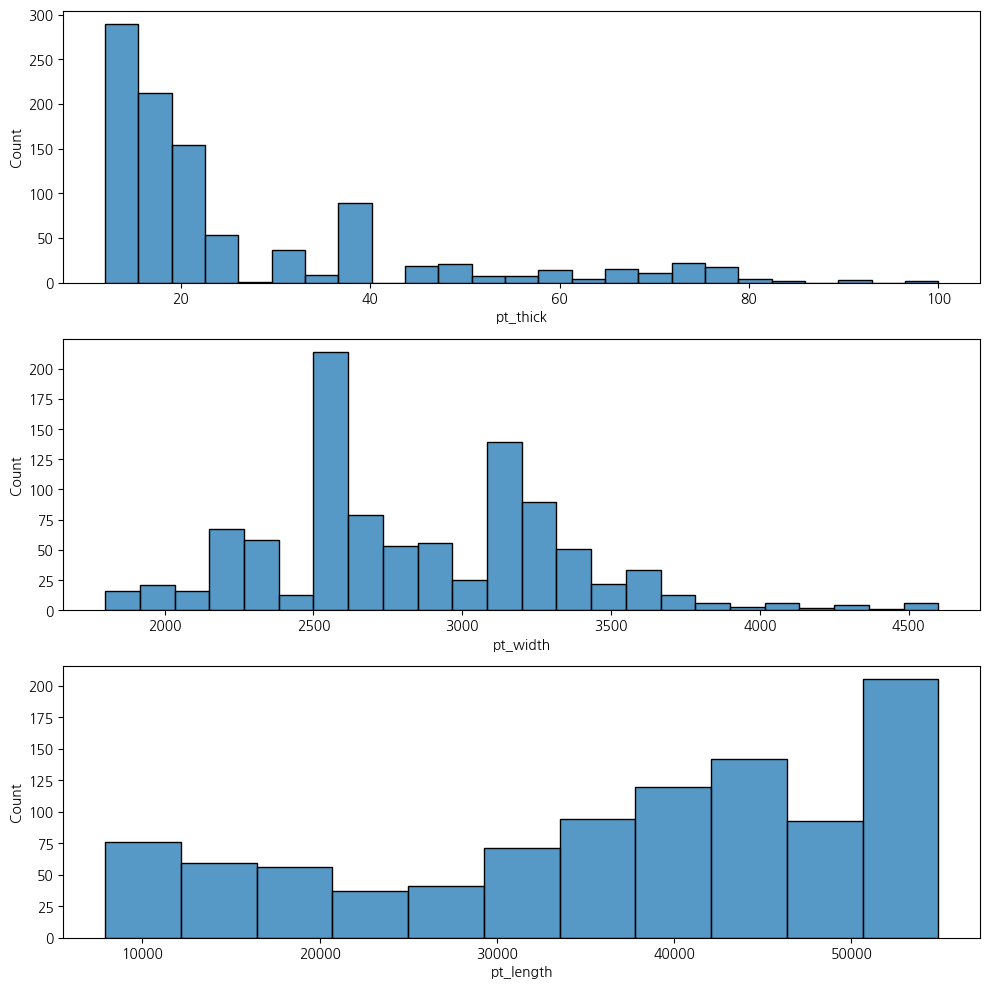

In [17]:
# 후판 지시두께, 지시폭, 지시길이 별 데이터 수 확인
# 밑에 양품/불량품 나눠서 데이터 수도 있으므로 필요없을거같긴함...

fig, axes = plt.subplots(3, 1, figsize=(10,10))

sns.histplot(df, x='pt_thick', ax=axes[0])
sns.histplot(df, x='pt_width', ax=axes[1])
sns.histplot(df, x='pt_length', ax=axes[2])

plt.tight_layout()
plt.show

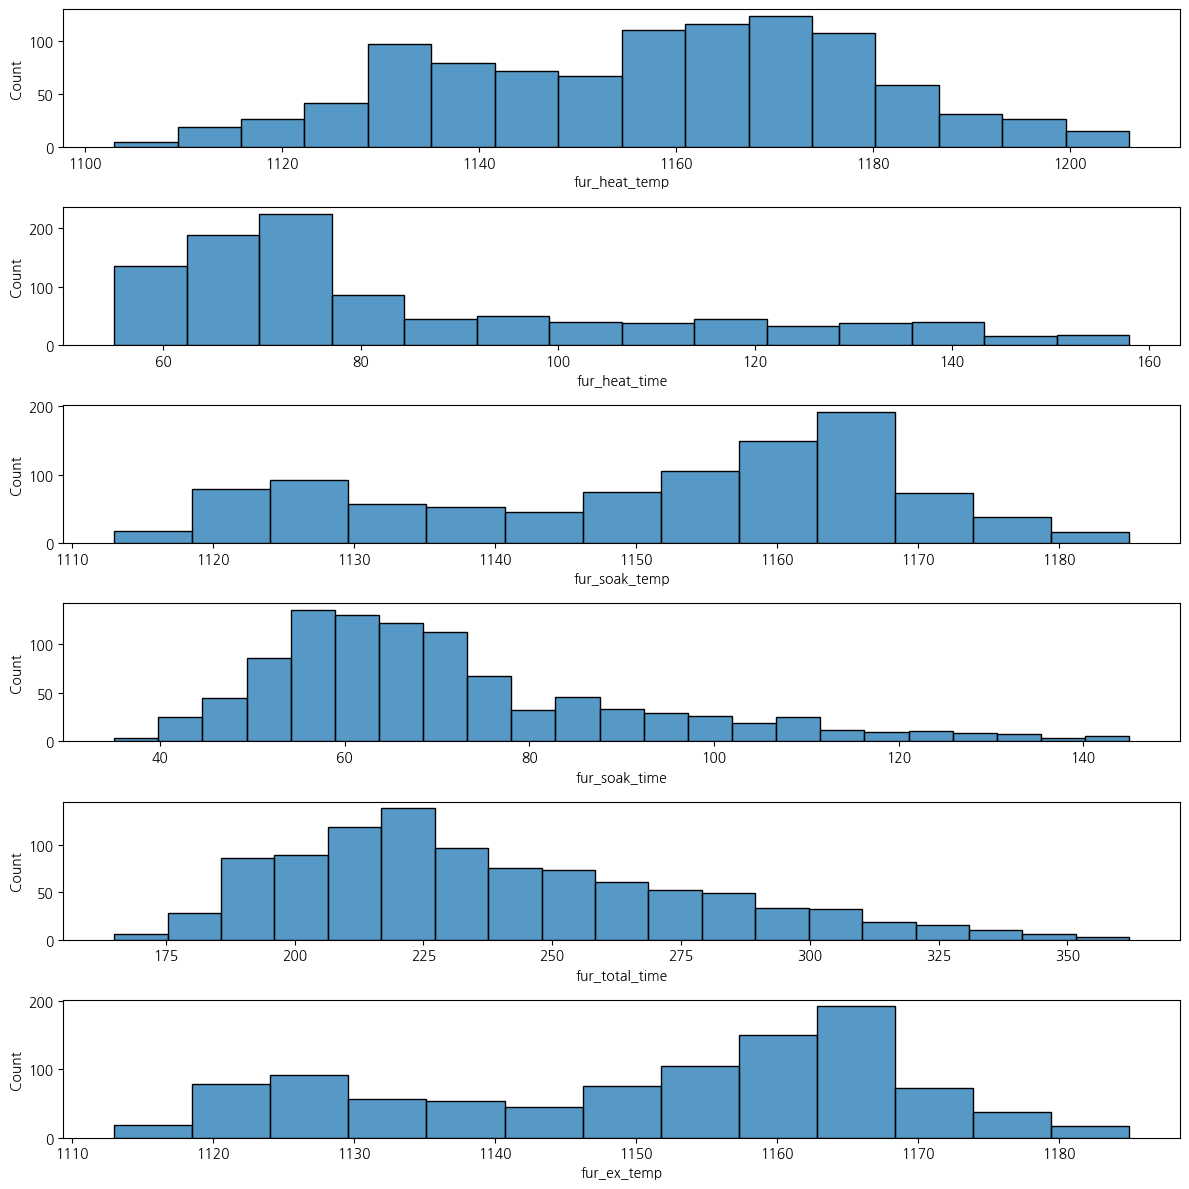

In [18]:
# 가열로 가열대 소재온도/재로시간, 가열로 균열대 소재온도/재로시간, 가열로 총 재로시간, 가열로 추출온도 별 데이터수
# 이것도 밑에 양품/불량품 나눠서 그래프 그린거 있음... 아마 필요없을듯

fig, axes = plt.subplots(6, 1, figsize=(12, 12))

sns.histplot(df, x="fur_heat_temp", ax=axes[0])
sns.histplot(df, x="fur_heat_time", ax=axes[1])
sns.histplot(df, x="fur_soak_temp", ax=axes[2])
sns.histplot(df, x="fur_soak_time", ax=axes[3])
sns.histplot(df, x="fur_total_time", ax=axes[4])
sns.histplot(df, x="fur_ex_temp", ax=axes[5])

plt.tight_layout()
plt.show()

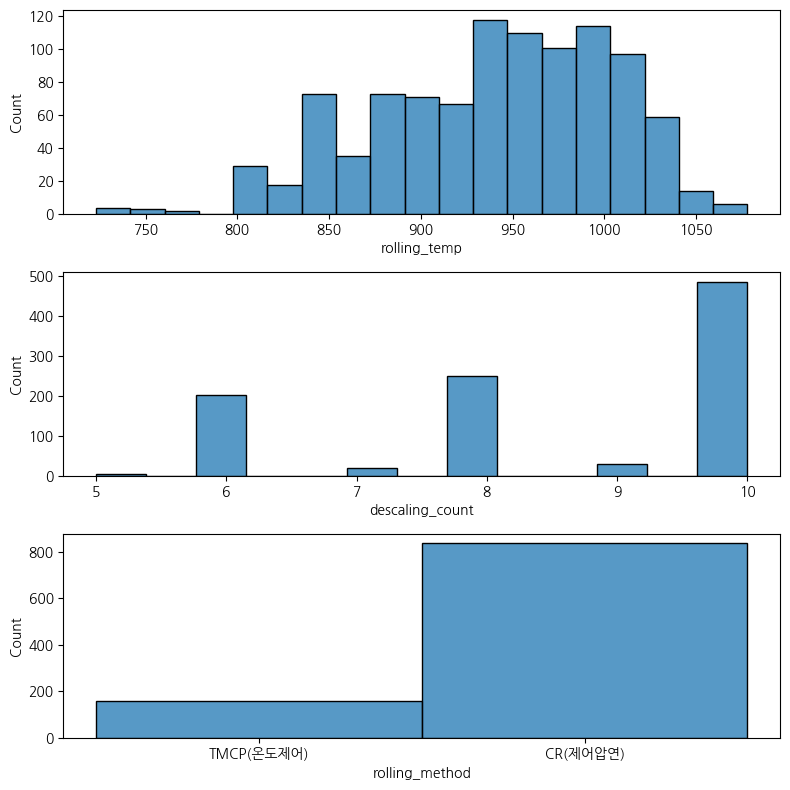

In [19]:
# 압연온도와 압연횟수, 압연방법 별 데이터 수

fig, axes = plt.subplots(3, 1, figsize=(8, 8))

sns.histplot(df, x="rolling_temp", ax=axes[0])
sns.histplot(df, x="descaling_count", ax=axes[1])
sns.histplot(df, x="rolling_method", ax=axes[2])


plt.tight_layout()
plt.show()

<Axes: title={'center': 'hsb별 데이터 분포'}, ylabel='빈도'>

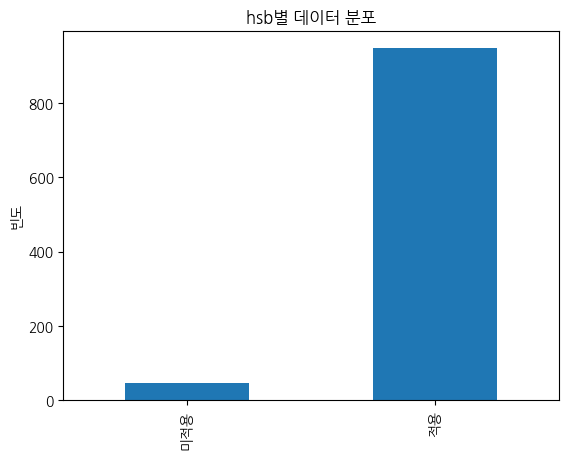

In [20]:
# hsb별 데이터 수 확인
df_h = df["hsb"].value_counts()
df_h.sort_index(inplace = True)

# 그래프 제목과 축 라벨 설정
plt.title('hsb별 데이터 분포')
plt.ylabel('빈도')
df_h.plot.bar()

영국     255
일본     185
미국     159
프랑스    143
한국     130
독일      86
공통      36
Name: spec_country, dtype: int64


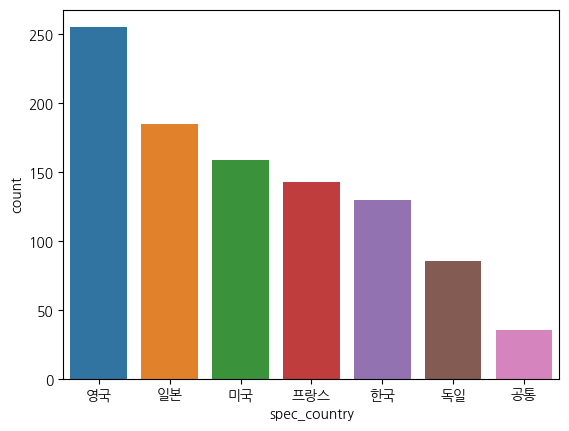

In [21]:
# 국가별 데이터 수
print(df["spec_country"].value_counts())

sns.countplot(x="spec_country", data=df, order=df["spec_country"].value_counts().index)
plt.show()

In [22]:
# 가열로 호기 별 데이터 수
df.groupby("fur_no").count().drop(columns=['index'])

,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_input_row,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
fur_no,,,,,,,,,,,,,,,,,,,,,
1호기,332,332,332,332,332,332,332,332,332,332,...,332,332,332,332,332,332,332,332,332,332
2호기,324,324,324,324,324,324,324,324,324,324,...,324,324,324,324,324,324,324,324,324,324
3호기,338,338,338,338,338,338,338,338,338,338,...,338,338,338,338,338,338,338,338,338,338


2조    290
1조    279
3조    215
4조    210
Name: work_group, dtype: int64


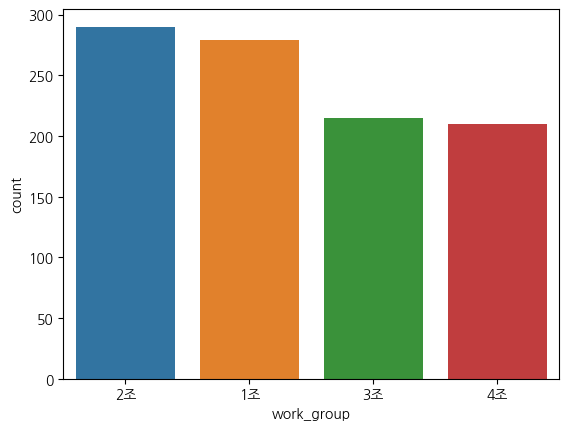

In [23]:
# 작업조 별 데이터 수
print(df["work_group"].value_counts())
sns.countplot(x="work_group", data=df, order=df["work_group"].value_counts().index)
plt.show()

In [24]:
df_numeric_x = df_numeric.drop("scale", axis = 1)
df_numeric_y = df_numeric["scale"]
df_numeric_x

,rolling_date,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count,date_n
0,2023-01-03 07:07:53,32,3700,15100,1144,116,1133,59,259,1133,934,8,1
1,2023-01-03 07:21:22,32,3700,15100,1144,122,1135,53,238,1135,937,8,1
2,2023-01-03 07:31:15,33,3600,19200,1129,116,1121,55,258,1121,889,8,1
3,2023-01-03 07:41:01,33,3600,19200,1152,125,1127,68,266,1127,885,8,1
4,2023-01-03 07:52:40,38,3100,13300,1140,134,1128,48,246,1128,873,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-10 05:32:25,19,3400,41500,1142,55,1151,86,203,1151,948,10,4
996,2023-01-10 05:39:19,19,3400,41500,1142,55,1151,86,209,1151,948,10,4
997,2023-01-10 05:52:41,17,3400,43700,1169,65,1163,77,227,1163,948,10,4
998,2023-01-10 06:01:50,17,3400,43700,1169,65,1163,77,204,1163,948,10,4


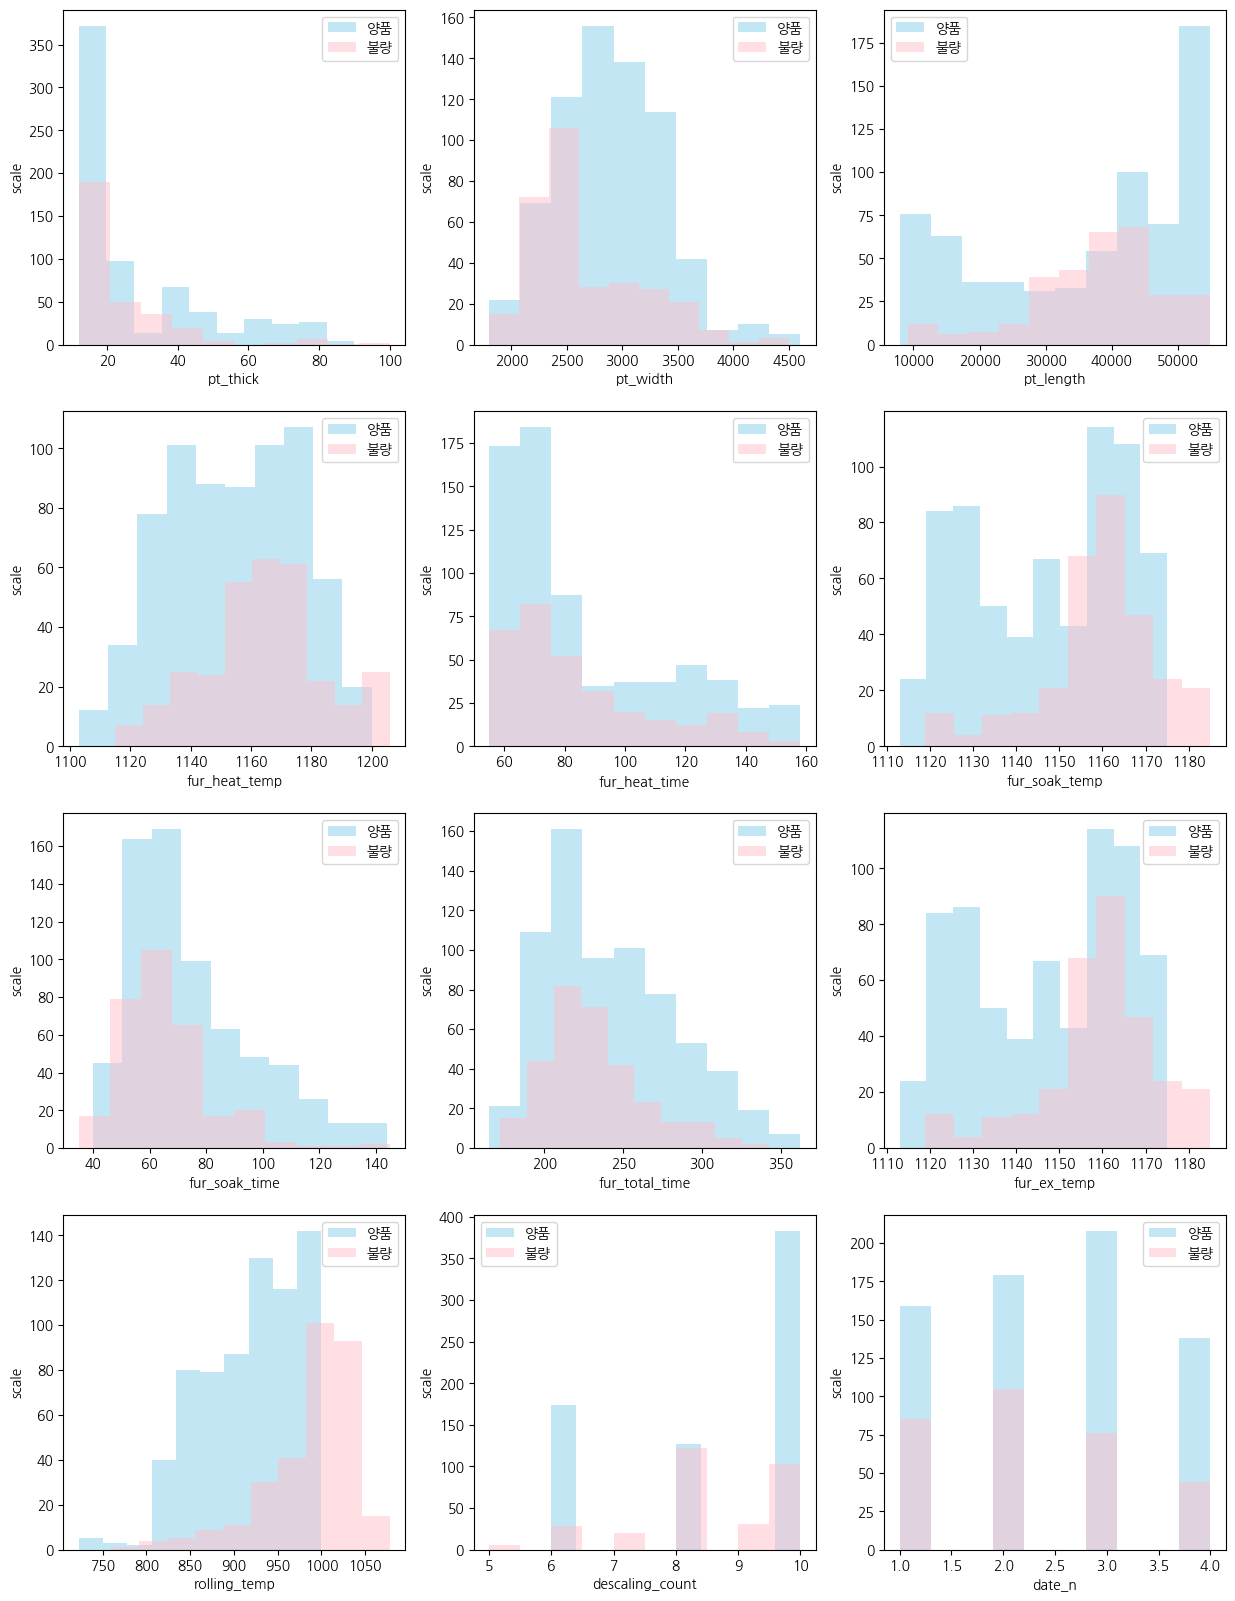

In [25]:
# 양품과 불량품의 각각의 데이터 수 확인

# 연속형 변수와 Scale의 상관관계를 보기위한 히스토그램 작성

i = 0
n_cols = 3 # 열의 수 설정
n_rows = 4

fig = plt.figure(figsize = (15,20))
columns = [col for col in df_numeric_x.columns if col not in ['rolling_date']]
for col in columns:
    plt.subplot(n_rows, n_cols, i+1)
    i += 1
    plt.hist(df[df["scale"] == 0][col], label = "양품", alpha = 0.5, color = 'skyblue')
    plt.hist(df[df["scale"] == 1][col], label = "불량", alpha = 0.5, color = 'pink')
    plt.xlabel(col)
    plt.ylabel("scale")
    plt.legend()
plt.show()

- 후판 지시두께(pt_thick) 작을 수록, 가열로 가열대/균열대/총 재로시간이 짧을 수록 불량이 높았다.
- (온도 - 압연온도(rolling_temp)는 높을 수록 불량이 높았지만, 가열대 소재온도(fur_heat_temp), 균열대 소재온도(fur_soak_temp), 가열로 추출온도(fur_ex_temp)는 확인필요)

In [26]:
# 연속형변수 간 상관도 확인
df.corr().round(3).drop('index').drop(columns=['index'])

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000,-0.094,-0.194,0.049,0.221,-0.036,0.327,-0.221,-0.129,0.327,0.511,-0.043
pt_thick,-0.094,1.000,-0.321,-0.867,-0.522,0.206,-0.663,0.364,0.344,-0.663,-0.451,-0.845
pt_width,-0.194,-0.321,1.000,0.149,0.201,-0.104,0.218,-0.101,-0.138,0.218,-0.155,0.354
pt_length,0.049,-0.867,0.149,1.000,0.467,-0.136,0.600,-0.336,-0.278,0.600,0.366,0.817
fur_heat_temp,0.221,-0.522,0.201,0.467,1.000,-0.162,0.785,-0.375,-0.315,0.785,0.341,0.484
fur_heat_time,-0.036,0.206,-0.104,-0.136,-0.162,1.000,-0.347,0.114,0.736,-0.347,-0.132,-0.164
fur_soak_temp,0.327,-0.663,0.218,0.600,0.785,-0.347,1.000,-0.601,-0.564,1.000,0.629,0.623
fur_soak_time,-0.221,0.364,-0.101,-0.336,-0.375,0.114,-0.601,1.000,0.633,-0.601,-0.487,-0.402
fur_total_time,-0.129,0.344,-0.138,-0.278,-0.315,0.736,-0.564,0.633,1.000,-0.564,-0.345,-0.341
fur_ex_temp,0.327,-0.663,0.218,0.600,0.785,-0.347,1.000,-0.601,-0.564,1.000,0.629,0.623


* 가열로 균열대 온도(fur_soak_temp)와 가열로 추출온도(fur_ex_temp)의 상관계수가 1이기때문에 가열로 추출온도(fur_ex_temp)를 지워도 될 것 같다고 판단함.

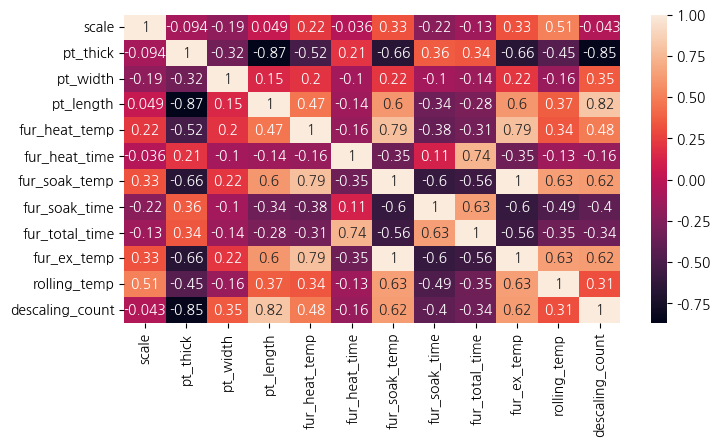

In [27]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr().drop('index').drop(columns=['index']),annot= True)
plt.show()

In [28]:
def crosstab_visual(df, variables, target):
    for var in variables:
        crosstab = pd.crosstab(df[var], df[target])
        crosstab.plot(kind='bar', stacked=True)
        plt.title(f"Cross-tabulation for {var} and {target}")
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.legend(title=target)
        plt.show()

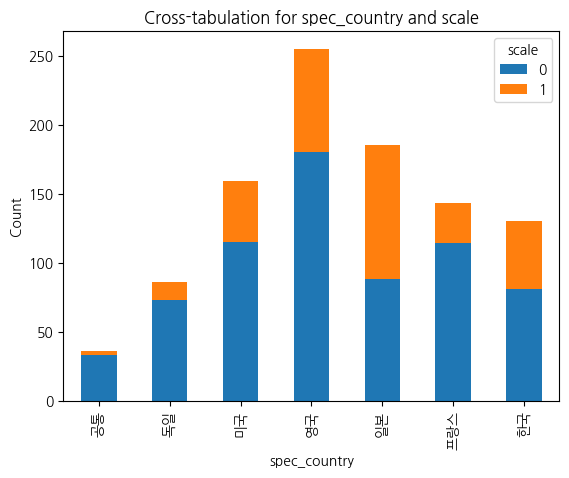

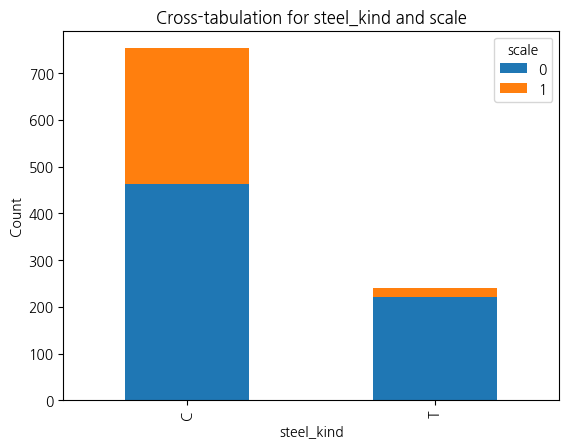

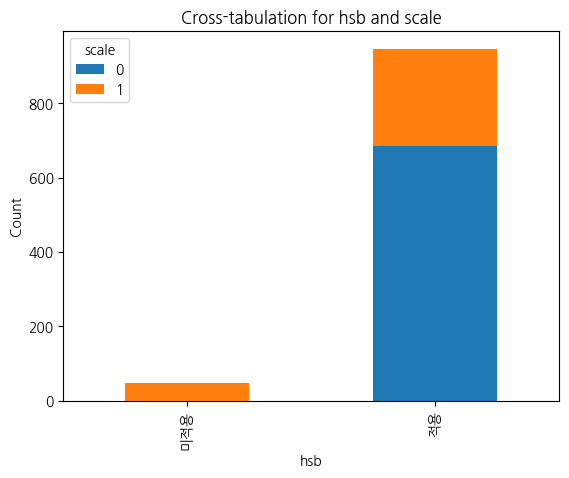

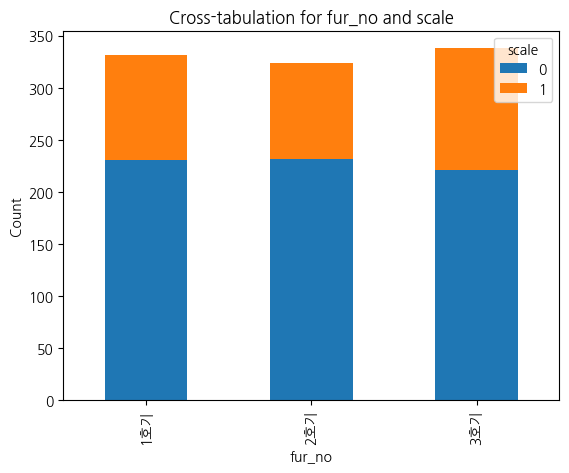

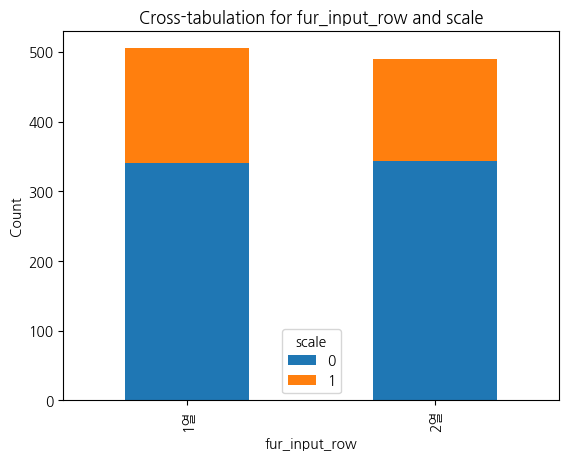

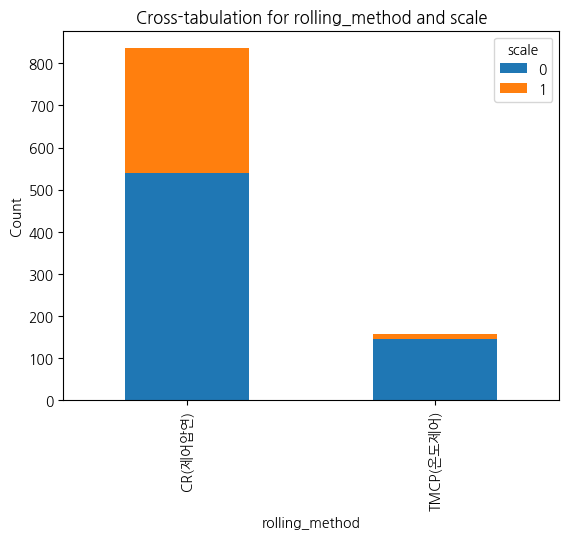

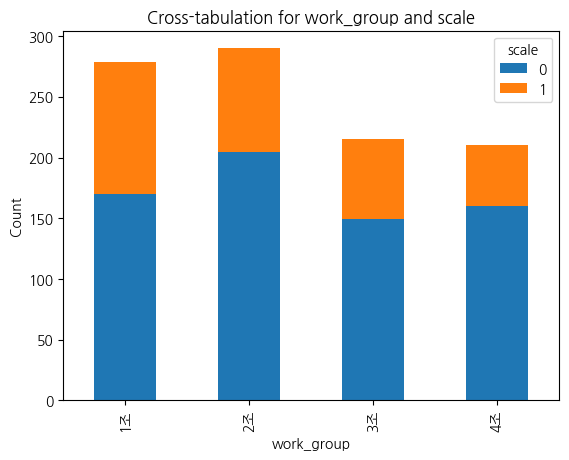

In [29]:
# 범주형변수 간 상관도 확인
variables = ['spec_country','steel_kind', 'hsb', 'fur_no', 'fur_input_row', 'rolling_method', 'work_group']

# 목표변수
target = 'scale'

# 함수 호출
crosstab_visual(df, variables, target)

일단 이까지 함....

# 네 개 근무조별 후판제품의 scale 불량 동일성 검정(카이제곱검정)

* 한 공장, 네 개 작업조 생산제품의 품질 수준이 같은지 검정(유의 수준 0.05)
1. 가설 수립

    H0: 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 없다 
    
    H1: 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 있다

In [30]:
# work_group를 기준으로 그룹화하고, scale 변수의 값들을 리스트로 모으기
grouped = df.groupby('work_group')['scale'].apply(list).reset_index()

# 'scale' 열의 값을 1조, 2조, 3조, 4조의 'key'에 맞게 설정
scale_mapping = {
    '1조': grouped[grouped['work_group'] == '1조']['scale'].values[0],
    '2조': grouped[grouped['work_group'] == '2조']['scale'].values[0],
    '3조': grouped[grouped['work_group'] == '3조']['scale'].values[0],
    '4조': grouped[grouped['work_group'] == '4조']['scale'].values[0]
}

# 'key'와 'value'를 가지는 데이터 프레임 생성
result_df = pd.DataFrame(list(scale_mapping.items()), columns=['work_group', 'scale'])

# 결과 출력
print(result_df)

  work_group                                              scale
0         1조  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
1         2조  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...
2         3조  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3         4조  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...


In [31]:
from scipy.stats import chi2_contingency

# df에서 'work_group'과 'scale' 열로 교차표 생성
cross_tab = pd.crosstab(df['work_group'], df['scale'])

#chi-square test 실행
chi, pval, dof, expected = chi2_contingency(cross_tab)

#결과 출력
print("chi-square test")
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree of freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 13.901
p: 0.003
degree of freedom: 3
expected value: 
[[191.988  87.012]
 [199.557  90.443]
 [147.948  67.052]
 [144.507  65.493]]


결론: p값은 0.05보다 훨씬 낮음 -> 귀무가설을 기각할 근거가 충분함

==>유의수준 5%에서 네 개 근무조별로 생산하는 후판제품의 scale 불량에는 차이가 있다고 할 수 있다.

# 압연 방법별 후판제품의 scale 불량 동일성 검정(카이제곱검정)
* 압연 방법별 후판제품의 품질 수준이 같은지 검정
1. 가설 수립

H0: TMCP,CR 두 압연 방법별 후판제품의 품질은 서로 같다. 

H1: TMCP, CR 두 압연 방법별 후판제품의 품질은 서로 다르다.

In [32]:
# rolling_method를 기준으로 그룹화하고, scale 변수의 값들을 리스트로 모으기
grouped = df.groupby('rolling_method')['scale'].apply(list).reset_index()

# 'scale' 열의 값을 1조, 2조, 3조, 4조의 'key'에 맞게 설정
scale_mapping = {
    'TMCP(온도제어)': grouped[grouped['rolling_method'] == 'TMCP(온도제어)']['scale'].values[0],
    'CR(제어압연)': grouped[grouped['rolling_method'] == 'CR(제어압연)']['scale'].values[0],
}

# 'key'와 'value'를 가지는 데이터 프레임 생성
result_df = pd.DataFrame(list(scale_mapping.items()), columns=['rolling_method', 'scale'])

# 결과 출력
print(result_df)

  rolling_method                                              scale
0     TMCP(온도제어)  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...
1       CR(제어압연)  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


In [33]:
# df에서 'rolling_method'과 'scale' 열로 교차표 생성
cross_tab = pd.crosstab(df['rolling_method'], df['scale'])

#chi-square test 실행
chi, pval, dof, expected = chi2_contingency(cross_tab)

#결과 출력
print("chi-square test")
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree of freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 44.880
p: 0.000
degree of freedom: 1
expected value: 
[[575.276 260.724]
 [108.724  49.276]]


결론: p값은 0.05보다 훨씬 낮음 -> 귀무가설을 기각할 근거가 충분함

==>유의수준 5%에서 공장에서 생산되는 후판제품은 압연 방법별(CR, TMCP)로 scale 불량에 차이가 있다고 할 수 있다.

# 강종별 후판제품의 scale 불량 동일성 검정
* 강종별 후판제품의 품질 수준이 같은지 검정

H0: 탄소강과 티타늄강. 두 강종별 후판제품의 품질은 서로 같다. 

H1: 탄소강과 티타늄강. 두 강종별 후판제품의 품질은 서로 다르다.

In [34]:
# steel_kind를 기준으로 그룹화하고, scale 변수의 값들을 리스트로 모으기
grouped = df.groupby('steel_kind')['scale'].apply(list).reset_index()

# 'scale' 열의 값을 탄소강(C), 티타늄강(T)의 'key'에 맞게 설정
scale_mapping = {
    'C': grouped[grouped['steel_kind'] == 'C']['scale'].values[0],
    'T': grouped[grouped['steel_kind'] == 'T']['scale'].values[0],
}

# 'key'와 'value'를 가지는 데이터 프레임 생성
result_df = pd.DataFrame(list(scale_mapping.items()), columns=['steel_kind', 'scale'])

# 결과 출력
print(result_df)

  steel_kind                                              scale
0          C  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1          T  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...


In [35]:
from scipy.stats import chi2_contingency

# df에서 'steel_kind'와 'scale' 열로 교차표 생성
cross_tab = pd.crosstab(df['steel_kind'], df['scale'])

#chi-square test 실행
chi, pval, dof, expected = chi2_contingency(cross_tab)

#결과 출력
print("chi-square test")
print('chisq: {0:0.3f}' .format(chi))
print('p: {0:0.3f}' .format(pval))
print('degree of freedom: {}' .format(dof))
print('expected value: \n{}' .format(expected.round(3)))

chi-square test
chisq: 76.258
p: 0.000
degree of freedom: 1
expected value: 
[[518.161 234.839]
 [165.839  75.161]]


결론: p값은 0.05보다 훨씬 낮음 -> 귀무가설을 기각할 근거가 충분함

==>유의수준 5%에서 공장에서 생산되는 후판제품은 강종별(CR, TMCP)로 scale 불량에 차이가 있다고 할 수 있다.

In [32]:
df[df['fur_total_time']>350]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
556,559,2023-01-07 04:43:54,0,PILAC-BT33,한국,T,50,2500,10900,적용,...,149,1123,98,351,1123,CR(제어압연),888,6,2조,3
562,565,2023-01-07 05:51:14,0,PILAC-BT33,한국,T,50,1800,22200,적용,...,156,1122,96,351,1122,CR(제어압연),901,6,2조,3
656,662,2023-01-07 21:59:05,0,NV-A,영국,C,12,3400,52100,적용,...,147,1137,105,352,1137,CR(제어압연),887,10,4조,3
693,699,2023-01-08 04:00:06,0,GL-A,독일,C,15,3100,51800,적용,...,157,1148,107,361,1148,CR(제어압연),942,10,4조,3
695,701,2023-01-08 04:22:24,0,LR-A,영국,C,15,3100,51800,적용,...,157,1148,99,362,1148,CR(제어압연),942,10,4조,3


fur_total_time(가열로 총 재로시간) 350분 이상이 이상치라고 나왔지만, 실제 공정에서 350분 이상이 잘못된 재로시간인지는 알아봐야함

pt_thick(후판 지시두께 = 목표두께), pt_width(후판 지시폭)은 고객사에서 원하는 지시두께와 지시폭이 어떠한지 모르므로 이상치라고 판단하기 어려울 것 같음

<Axes: ylabel='scale'>

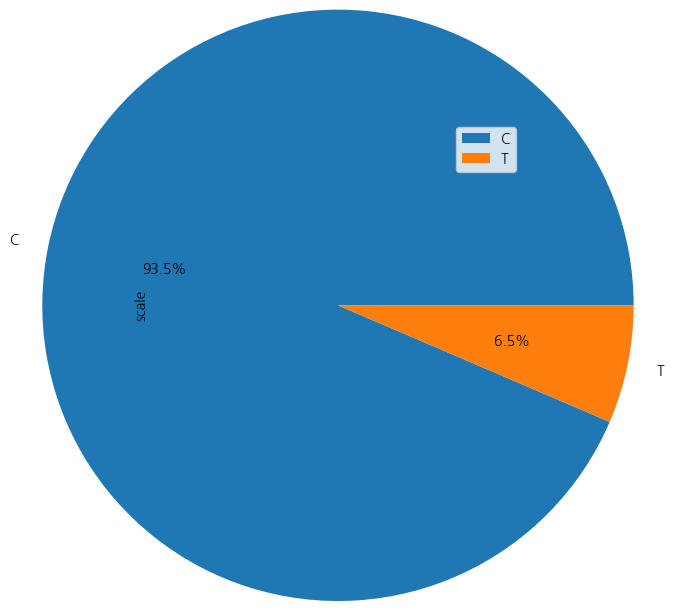

In [33]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("steel_kind", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["steel_kind"], autopct= "%.1f%%", radius = 2)

불량의 93.5%는 탄소강일 때 발생한다. 티타늄강보다 탄소강의 갯수가 많아서 불량률이 더 높은 것 같다

In [34]:
df[df["rolling_method"]=="CR(제어압연)"]

,index,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date_n
10,10,2023-01-03 08:54:07,0,COMMON,공통,T,38,3100,16200,적용,...,119,1124,73,261,1124,CR(제어압연),881,8,1조,1
12,12,2023-01-03 09:17:03,0,COMMON,공통,T,38,3100,16200,적용,...,134,1123,58,259,1123,CR(제어압연),869,8,1조,1
14,14,2023-01-03 09:33:17,0,COMMON,공통,T,38,3100,16200,적용,...,125,1127,62,286,1127,CR(제어압연),820,8,1조,1
15,15,2023-01-03 09:42:31,1,COMMON,공통,T,38,3100,16200,적용,...,120,1125,68,259,1125,CR(제어압연),1057,8,1조,1
17,17,2023-01-03 10:00:51,0,COMMON,공통,T,30,1900,34800,적용,...,130,1120,65,282,1120,CR(제어압연),926,8,1조,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,2023-01-10 05:32:25,0,BV-A,프랑스,C,19,3400,41500,적용,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,4
990,996,2023-01-10 05:39:19,0,LR-A,영국,C,19,3400,41500,적용,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,4
991,997,2023-01-10 05:52:41,0,AB/AH32,미국,C,17,3400,43700,적용,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,4
992,998,2023-01-10 06:01:50,0,NV-A32,영국,C,17,3400,43700,적용,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,4


<Axes: ylabel='scale'>

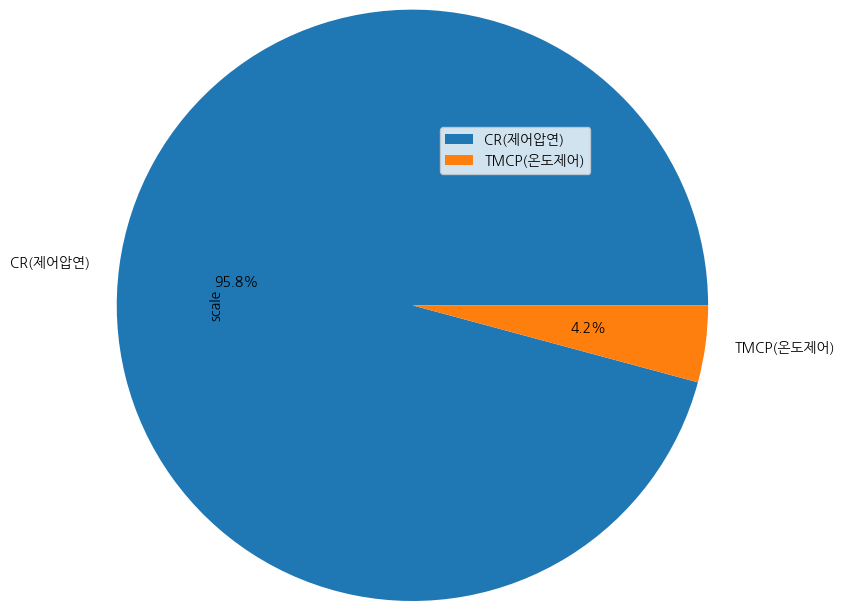

In [35]:
df_sub = df[df["scale"] == 1]
df_count = df_sub.groupby("rolling_method", as_index = False).agg("count")
df_count.plot.pie(y = "scale", labels = df_count["rolling_method"], autopct= "%.1f%%", radius = 2)

In [36]:
df_groups = df.groupby(["hsb"])["scale"]
df_w = pd.DataFrame(columns = ["hsb", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"hsb" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,hsb,scale_prob
0,미적용,1.000000
1,적용,0.277719


hsb를 미적용 하면 무조건 scale 발생한다. -> hsb는 무조건 적용해야 한다

In [37]:
len(df.groupby(["spec_long"]))

66

In [38]:
df_groups = df.groupby(["spec_long"])["scale"]
df_w = pd.DataFrame(columns = ["spec_long", "scale_prob"])
c = 0.0
for name, g in df_groups:
    df_w = df_w.append({"spec_long" : name , "scale_prob" : (g.tolist().count(1)/(g.shape[0]))}, ignore_index = True )
df_w

,spec_long,scale_prob
0,A131-DH36TM,1.000000
1,A283-C,0.833333
2,A516-60,0.666667
3,A709-36,0.000000
4,AB/A,0.254902
...,...,...
61,NV-E32-TM,0.000000
62,NV-E36-TM,0.000000
63,PILAC-BT33,0.052632
64,SA283-C,0.476190


In [39]:
df['spec_long'].value_counts()

JS-SM490YB     82
LR-A           81
LR-AH32        52
AB/A           51
NV-A           48
               ..
LR-AH36         1
BV-AH36-TM      1
A131-DH36TM     1
KR-B            1
KS-HSB600       1
Name: spec_long, Length: 66, dtype: int64

spec_long : 군집화해서 양품/불량 비교 해보기

In [40]:
# 스펙 군집화
df_spec_cluster = df.groupby(["spec_long"]).mean()
df_spec_cluster

,index,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
spec_long,,,,,,,,,,,,,
A131-DH36TM,612.000000,1.000000,71.000000,3600.000000,9200.000000,1128.000000,92.000000,1121.000000,145.000000,332.000000,1121.000000,859.000000,6.000000
A283-C,853.000000,0.833333,23.500000,2600.000000,32333.333333,1166.666667,69.500000,1161.333333,68.166667,222.166667,1161.333333,1014.000000,8.500000
A516-60,341.000000,0.666667,16.000000,3333.333333,45100.000000,1177.000000,72.000000,1171.000000,68.666667,236.000000,1171.000000,938.000000,9.333333
A709-36,336.000000,0.000000,26.000000,2800.000000,28900.000000,1150.000000,63.000000,1154.000000,59.000000,197.000000,1154.000000,993.000000,8.000000
AB/A,640.764706,0.254902,16.431373,3017.647059,45741.176471,1161.960784,92.705882,1155.176471,67.313725,238.960784,1155.176471,947.039216,9.529412
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NV-E32-TM,502.500000,0.000000,13.500000,2500.000000,54500.000000,1149.000000,86.000000,1146.500000,73.500000,245.500000,1146.500000,890.500000,10.000000
NV-E36-TM,46.000000,0.000000,52.800000,3160.000000,15100.000000,1135.400000,108.600000,1127.400000,69.800000,251.800000,1127.400000,862.800000,6.800000
PILAC-BT33,577.052632,0.052632,62.763158,2334.210526,15084.210526,1144.184211,127.315789,1123.894737,85.973684,291.605263,1123.894737,885.605263,6.000000


In [41]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_spec_cluster)
df_scaled[:5]

array([[ 0.64365617,  1.99392236,  2.20811142,  1.95916953, -1.77387351,
        -1.64781012,  0.43585406, -1.60237864,  3.27263347,  3.02497189,
        -1.60237864, -1.00258858, -1.3041224 ],
       [ 1.71863751,  1.49156097, -0.4079429 , -0.41498521, -0.04098174,
         0.8296    , -1.04945051,  0.9250361 , -0.4506707 , -0.76374291,
         0.9250361 ,  1.37186861,  0.29226361],
       [-0.56514028,  0.98919958, -0.82100411,  1.3260616 ,  0.91535478,
         1.4916665 , -0.88441667,  1.53078013, -0.42644095, -0.28656031,
         1.53078013,  0.20761863,  0.82439227],
       [-0.5874428 , -1.02024597, -0.27025583,  0.05984574, -0.29816885,
        -0.23824919, -1.47853849,  0.46550615, -0.89488269, -1.63187027,
         0.46550615,  1.05016796, -0.0270136 ],
       [ 0.77196124, -0.25192856, -0.79724634,  0.57657354,  0.96338459,
         0.52808964,  0.48245185,  0.53922753, -0.49200379, -0.18442768,
         0.53922753,  0.34609109,  0.94959902]])